In [380]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
'''
We will predict using the Online shopper behavior dataset features whether Revenue will be generated. 
'''

In [344]:
df1 = pd.read_csv('online_shoppers_intention.csv')
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [345]:
'''
Column explanations

Administrative : Administrative Value
Administrative_Duration : Duration in Administrative Page
Informational : Informational Value
Informational_Duration : Duration in Informational Page
ProductRelated : Product Related Value
ProductRelated_Duration : Duration in Product Related Page
BounceRates : Bounce Rates of a web page
ExitRates : Exit rate of a web page
PageValues : Page values of each web page
SpecialDay : Special days like valentine etc
Month : Month of the year
OperatingSystems : Operating system used
Browser : Browser used
Region : Region of the user
TrafficType : Traffic Type
VisitorType : Types of Visitor
Weekend : Weekend or not
Revenue : Revenue will be generated or not
'''

'\n\nAdministrative : Administrative Value\nAdministrative_Duration : Duration in Administrative Page\nInformational : Informational Value\nInformational_Duration : Duration in Informational Page\nProductRelated : Product Related Value\nProductRelated_Duration : Duration in Product Related Page\nBounceRates : Bounce Rates of a web page\nExitRates : Exit rate of a web page\nPageValues : Page values of each web page\nSpecialDay : Special days like valentine etc\nMonth : Month of the year\nOperatingSystems : Operating system used\nBrowser : Browser used\nRegion : Region of the user\nTrafficType : Traffic Type\nVisitorType : Types of Visitor\nWeekend : Weekend or not\nRevenue : Revenue will be generated or not\n'

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

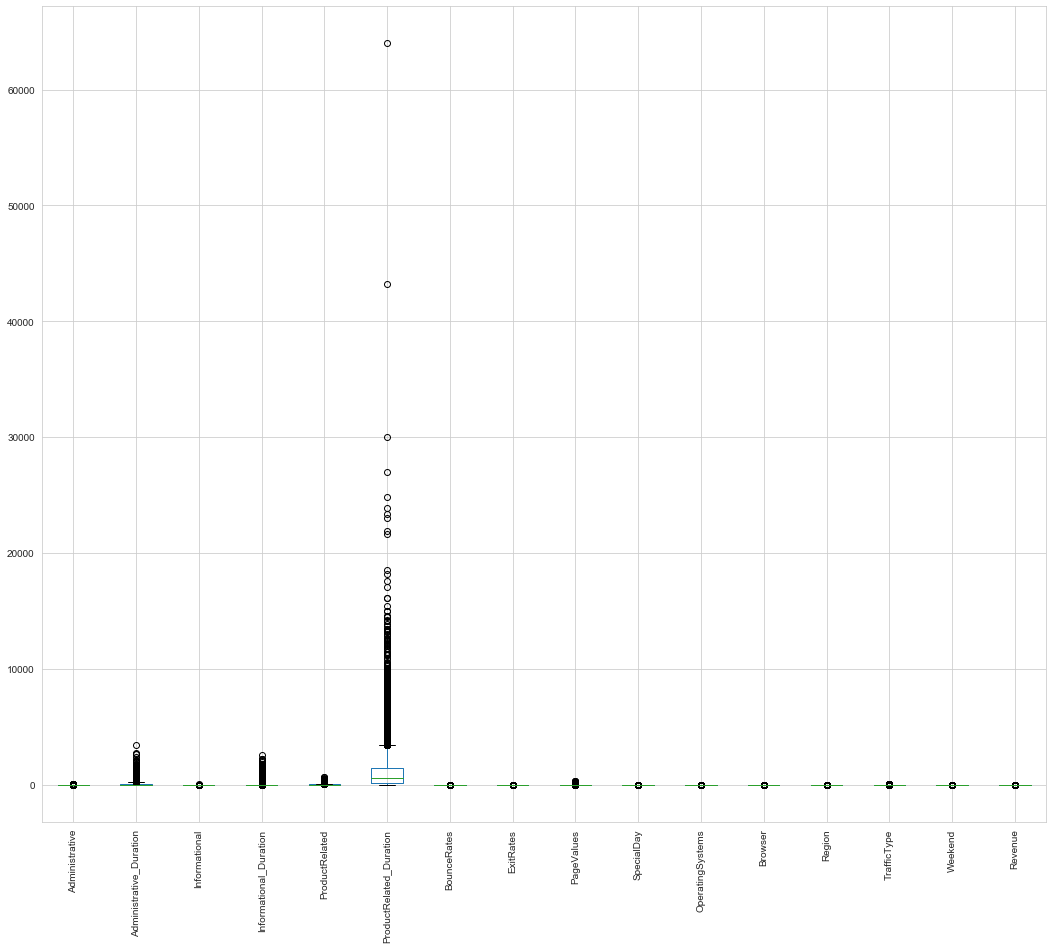

In [379]:
df1.boxplot()
plt.xticks(rotation=90)

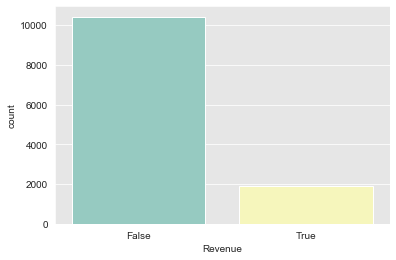

In [252]:
sns.countplot(df['Revenue'], palette='Set3')

In [288]:
df1['Month']=df1['Month'].astype('category')
df1['VisitorType']=df1['VisitorType'].astype('category')
df1['Weekend']=df1['Weekend'].astype('category')
df1['Revenue']=df1['Revenue'].astype('category')

In [289]:
df1['Month']=df1['Month'].cat.codes
df1['VisitorType']=df1['VisitorType'].cat.codes
df1['Weekend']=df1['Weekend'].cat.codes
df1['Revenue']=df1['Revenue'].cat.codes

In [290]:
df1=df1.mask(df1=='NaN').fillna(df1.mean())

C:\Users\Student\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [291]:
df1.astype('float64')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2.0,4.0,1.0,9.0,3.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1.0,4.0,6.0,1.0,1.0,2.0,1.0,0.0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7.0,3.0,2.0,1.0,8.0,2.0,1.0,0.0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7.0,3.0,2.0,1.0,13.0,2.0,1.0,0.0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7.0,2.0,2.0,3.0,11.0,2.0,0.0,0.0


In [292]:
'''
Logistic Regression
'''

'\nLogistic Regression\n'

In [293]:
# Create features and labels
X = df1.drop('Revenue', axis=1)  
y = df1['Revenue'] 

In [294]:
from sklearn.model_selection import train_test_split
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [295]:
from sklearn.preprocessing import StandardScaler
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [296]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
model_log=logreg.fit(scaled_data_train, y_train)

In [297]:
# Generate predictions
y_hat_train = logreg.predict(scaled_data_train)
y_hat_test = logreg.predict(scaled_data_test)

In [298]:
import statsmodels.api as sm

# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

result.summary()

C:\Users\Student\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.297069
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12312
Method:                           MLE   Df Model:                           17
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.3105
Time:                        11:04:46   Log-Likelihood:                -3662.9
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.2661      0.150    -15.102      0.000      -2.560      -1.972
Administrative              0.0022      0.011      0.200      0.842      -0.019       0.024
Administrative_Duration    -0.0001      0.000     -0.764      0.445      -0.001       0.000
Informational               0.0291      0.027      1.088      0.277      -0.023       0.081
Informational_Duration   6.484e-05      0.000      0.291      0.771      -0.000       0.001
ProductRelated              0.0035      0.001      3.055      0.002       0.001       0.006
ProductRelated_Duration  5.789e-05   2.73e-05      2.119      0.034    4.34e-06       0.000
BounceRates                -3.0711      3.138     -0.979      0.328      -9.221       3.079
ExitRates                 -15.0336      2.363     -6.362      0.000     -19.665     -10.402
PageValues                  0.0802      0.002     34.065      0.000       0.076       0.085
SpecialDay                 -0.9619      0.217     -4.438      0.000      -1.387      -0.537
Month                       0.1055      0.014      7.730      0.000       0.079       0.132
OperatingSystems           -0.0890      0.038     -2.344      0.019      -0.164      -0.015
Browser                     0.0352      0.018      1.917      0.055      -0.001       0.071
Region                     -0.0153      0.013     -1.174      0.240      -0.041       0.010
TrafficType                 0.0073      0.008      0.888      0.375      -0.009       0.023
VisitorType                -0.1790      0.042     -4.224      0.000      -0.262      -0.096
Weekend                     0.1216      0.070      1.729      0.084      -0.016       0.260
===========================================================================================
"""

In [299]:
df2=df1

In [300]:
df2=df1.drop(['Administrative'],axis=1)

In [301]:
df2=df2.drop(['Administrative_Duration'],axis=1)

In [302]:
df2=df2.drop(['Informational_Duration'],axis=1)

In [303]:
df2=df2.drop(['Informational'],axis=1)

In [304]:
df2=df2.drop(['BounceRates'],axis=1)

In [305]:
df2=df2.drop(['Browser'],axis=1)

In [306]:
df2=df2.drop(['Region'],axis=1)

In [307]:
df2=df2.drop(['TrafficType'],axis=1)

In [308]:
df2=df2.drop(['Weekend'],axis=1)

In [309]:
# Create features and labels
X = df2.drop('Revenue', axis=1)  
y = df2['Revenue'] 

In [310]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [311]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [312]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
model_log=logreg.fit(scaled_data_train, y_train)

In [313]:
# Generate predictions
y_hat_train = logreg.predict(scaled_data_train)
y_hat_test = logreg.predict(scaled_data_test)

In [314]:


# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

result.summary()

C:\Users\Student\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.297566
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12321
Method:                           MLE   Df Model:                            8
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.3094
Time:                        11:04:57   Log-Likelihood:                -3669.0
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1744      0.134    -16.231      0.000      -2.437      -1.912
ProductRelated              0.0036      0.001      3.224      0.001       0.001       0.006
ProductRelated_Duration  6.092e-05   2.63e-05      2.321      0.020    9.47e-06       0.000
ExitRates                 -16.7158      1.610    -10.385      0.000     -19.871     -13.561
PageValues                  0.0801      0.002     34.293      0.000       0.076       0.085
SpecialDay                 -0.9656      0.217     -4.446      0.000      -1.391      -0.540
Month                       0.1057      0.014      7.789      0.000       0.079       0.132
OperatingSystems           -0.0760      0.037     -2.039      0.041      -0.149      -0.003
VisitorType                -0.1786      0.042     -4.228      0.000      -0.261      -0.096
===========================================================================================
"""

In [372]:
df2=df2.drop(['Informational'],axis=1)

In [373]:
df2=df2.drop(['Region'],axis=1)

In [317]:
# Create features and labels
X = df2.drop('Revenue', axis=1)  
y = df2['Revenue'] 

In [318]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [319]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [320]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
model_log=logreg.fit(scaled_data_train, y_train)

In [321]:
# Generate predictions
y_hat_train = logreg.predict(scaled_data_train)
y_hat_test = logreg.predict(scaled_data_test)

In [322]:
# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.297566
         Iterations 8


C:\Users\Student\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12321
Method:                           MLE   Df Model:                            8
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.3094
Time:                        11:05:11   Log-Likelihood:                -3669.0
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1744      0.134    -16.231      0.000      -2.437      -1.912
ProductRelated              0.0036      0.001      3.224      0.001       0.001       0.006
ProductRelated_Duration  6.092e-05   2.63e-05      2.321      0.020    9.47e-06       0.000
ExitRates                 -16.7158      1.610    -10.385      0.000     -19.871     -13.561
PageValues                  0.0801      0.002     34.293      0.000       0.076       0.085
SpecialDay                 -0.9656      0.217     -4.446      0.000      -1.391      -0.540
Month                       0.1057      0.014      7.789      0.000       0.079       0.132
OperatingSystems           -0.0760      0.037     -2.039      0.041      -0.149      -0.003
VisitorType                -0.1786      0.042     -4.228      0.000      -0.261      -0.096
===========================================================================================
"""

In [323]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def Metrics(y_train,y_hat_train,y_test,y_hat_test):
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('\n\n')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('\n\n')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n\n')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [324]:
Metrics(y_train,y_hat_train,y_test,y_hat_test)

Training Precision:  0.616234124792932
Testing Precision:  0.5865168539325842



Training Recall:  0.72893533638145
Testing Recall:  0.6923076923076923



Training Accuracy:  0.8874695863746959
Testing Accuracy:  0.878345498783455



Training F1-Score:  0.6678635547576302
Testing F1-Score:  0.635036496350365


In [ ]:
'''
Recall is larger than Precision, indicating that there are more false positives.  
'''

In [338]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_hat_test, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1905,184,2089
1,116,261,377
All,2021,445,2466


In [ ]:
'''
The Logistic regression classified 1905 of observations correctly as false and 261 of observations correctly as true, and 
misclassified 184 observations as true and 116 observations as false.  
'''

In [326]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc
# Check the AUC for predictions
false_positive_train_rate, true_positive_train_rate, thresholds = roc_curve(y_train, y_hat_train)
roc_auc = auc(false_positive_train_rate, true_positive_train_rate)

Training AUC: 0.8227660001240025


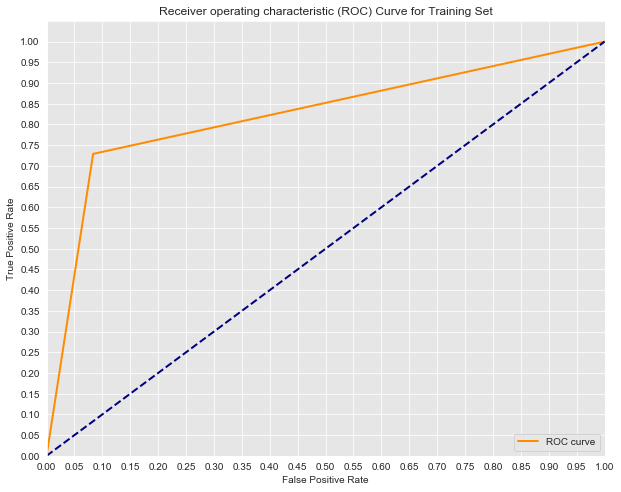

In [327]:
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate, true_positive_train_rate, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(false_positive_train_rate, true_positive_train_rate)))
plt.show()

In [328]:
# Check the AUC for predictions
false_positive_test_rate, true_positive_test_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_test_rate, true_positive_test_rate)

Test AUC: 0.8021136355267519



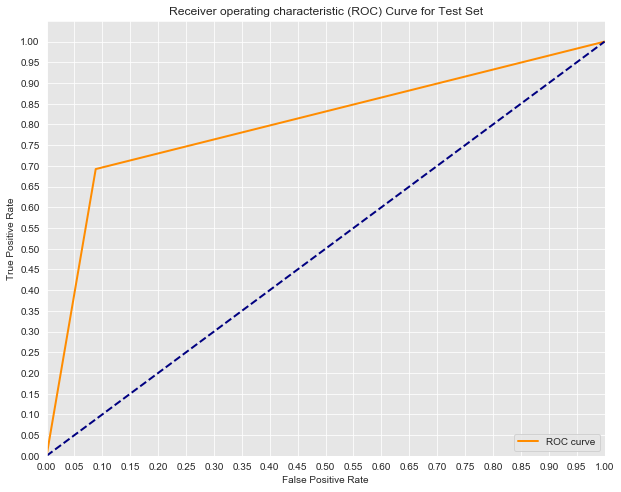

In [329]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_test_rate, true_positive_test_rate, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(false_positive_test_rate, true_positive_test_rate)))
print('')
plt.show()

In [ ]:
'''
True positive rate is larger than flase positive rate, indicating a good model.
'''

In [135]:
'''
Random Forest
'''

'\nRandom Forest\n'

In [330]:
# Create features and labels
X1 = df1.drop('Revenue', axis=1)  
y1 = df1['Revenue'] 

In [331]:
# Perform an 80/20 split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=10) 

In [332]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train1 = scaler.fit_transform(X_train1)
scaled_data_test1 = scaler.transform(X_test1)

In [333]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(scaled_data_train1, y_train1)

RandomForestClassifier(max_depth=5)

In [334]:
# Make predictions for test data
y_hat_train1 = forest.predict(scaled_data_train1)
y_hat_test1 = forest.predict(scaled_data_test1) 

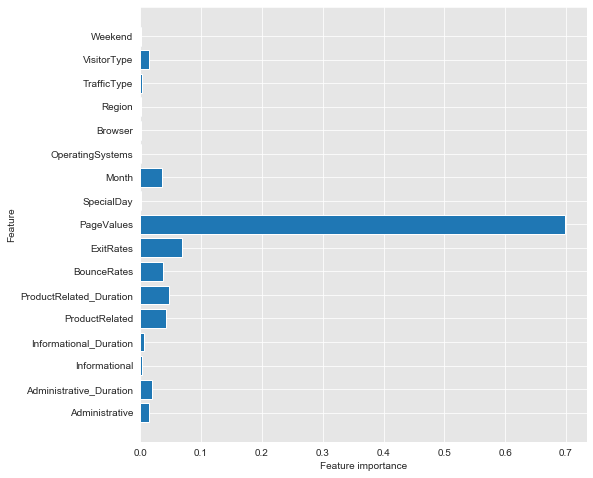

In [335]:
def plot_feature_importances(model,data_train):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest,X_train1)

In [336]:
Metrics(y_train1,y_hat_train1,y_test1,y_hat_test1)

Training Precision:  0.8439869989165764
Testing Precision:  0.7777777777777778



Training Recall:  0.5088177661659047
Testing Recall:  0.4270557029177719



Training Accuracy:  0.9091646390916464
Testing Accuracy:  0.8937550689375506



Training F1-Score:  0.6348818255908721
Testing F1-Score:  0.5513698630136986


In [ ]:
'''
Precision is larger than Recall, indicating that there are more false negatives.  
'''

In [337]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test1, y_hat_test1, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,2043,46,2089
1,216,161,377
All,2259,207,2466


In [ ]:
'''
The Random forest classified 2043 of observations correctly as false and 161 of observations correctly as true, and 
misclassified 46 observations as true and 216 observations as false.  
'''

In [339]:
# Check the AUC for predictions
false_positive_train_rate1, true_positive_train_rate1, thresholds1 = roc_curve(y_train1, y_hat_train1)
roc_auc = auc(false_positive_train_rate1, true_positive_train_rate1)

Training AUC: 0.7457685374691277


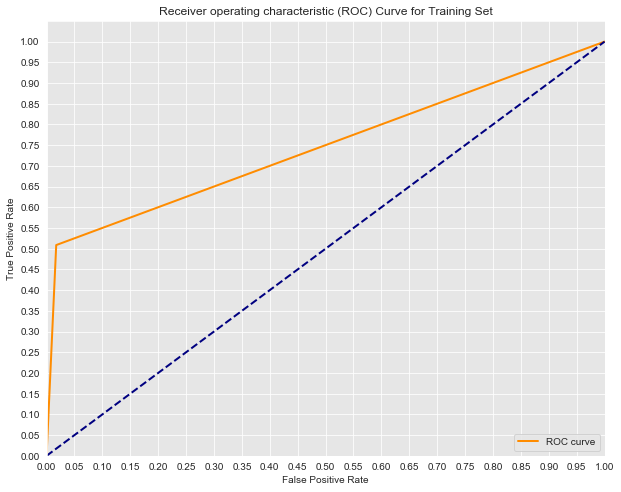

In [340]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate1, true_positive_train_rate1, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(false_positive_train_rate1, true_positive_train_rate1)))
plt.show()

In [341]:
# Check the AUC for predictions
false_positive_test_rate1, true_positive_test_rate1, thresholds1 = roc_curve(y_test1, y_hat_test1)
roc_auc = auc(false_positive_test_rate1, true_positive_test_rate1)

Test AUC: 0.7025177988021124



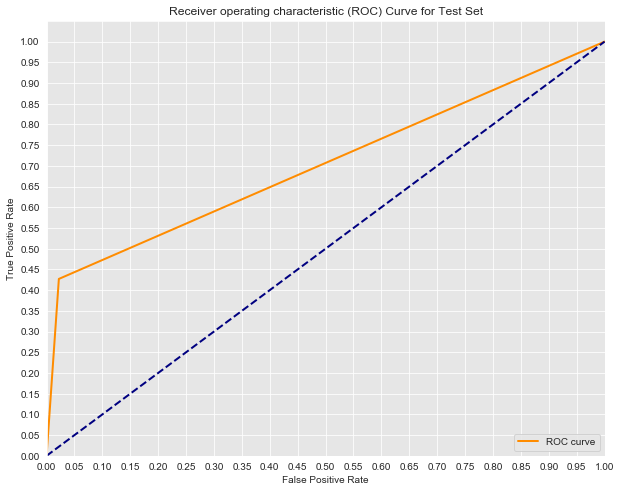

In [342]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_test_rate1, true_positive_test_rate1, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(false_positive_test_rate1, true_positive_test_rate1)))
print('')
plt.show()

In [ ]:
'''
True positive rate is larger than flase positive rate, indicating a good model.
'''

In [268]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [269]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [270]:
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(scaled_data_train1, y_train1)

GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 30, 100]})

In [271]:
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [272]:
forest2 = RandomForestClassifier(criterion='entropy',
                           max_depth=10,
                           min_samples_split=5,
                           min_samples_leaf=3,
                           n_estimators=100)
forest2.fit(scaled_data_train1, y_train1)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=5)

In [273]:
# Make predictions for test data
y_hat_train2 = forest2.predict(scaled_data_train1)
y_hat_test2 = forest2.predict(scaled_data_test1) 

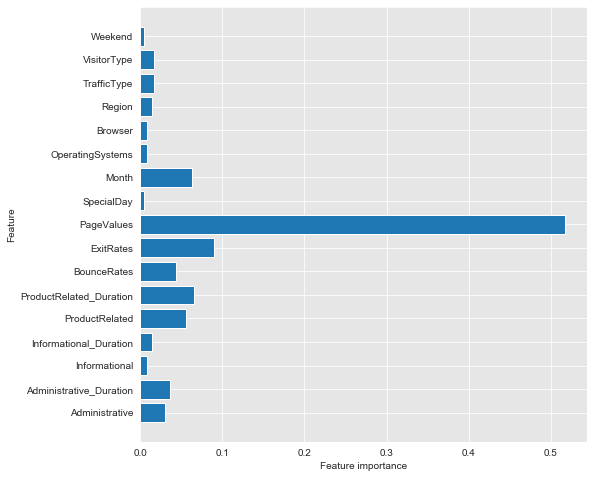

In [274]:
plot_feature_importances(forest2,X_train1)

In [276]:
Metrics(y_train1,y_hat_train2,y_test1,y_hat_test2)

Training Precision:  0.8928571428571429
Testing Precision:  0.737410071942446



Training Recall:  0.7184846505551927
Testing Recall:  0.5437665782493368



Training Accuracy:  0.9429237631792377
Testing Accuracy:  0.9006488240064883



Training F1-Score:  0.7962359753890699
Testing F1-Score:  0.6259541984732824


In [ ]:
'''
Ajusting the parameters increased recall.  
'''

In [277]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test1, y_hat_test2, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,2016,73,2089
1,172,205,377
All,2188,278,2466


In [278]:
false_positive_train_rate1, true_positive_train_rate1, thresholds1 = roc_curve(y_train1, y_hat_train2)
roc_auc = auc(false_positive_train_rate1, true_positive_train_rate1)

Training AUC: 0.8513220084649238


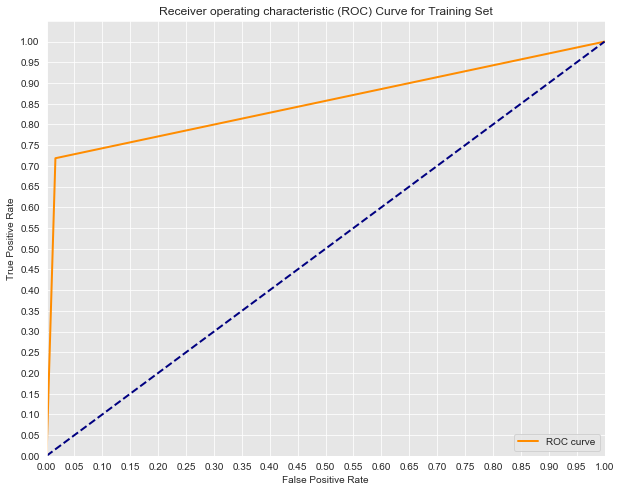

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate1, true_positive_train_rate1, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(false_positive_train_rate1, true_positive_train_rate1)))
plt.show()

In [280]:
# Check the AUC for predictions
false_positive_test_rate1, true_positive_test_rate1, thresholds1 = roc_curve(y_test1, y_hat_test2)
roc_auc = auc(false_positive_test_rate1, true_positive_test_rate1)

Test AUC: 0.7544108142563104



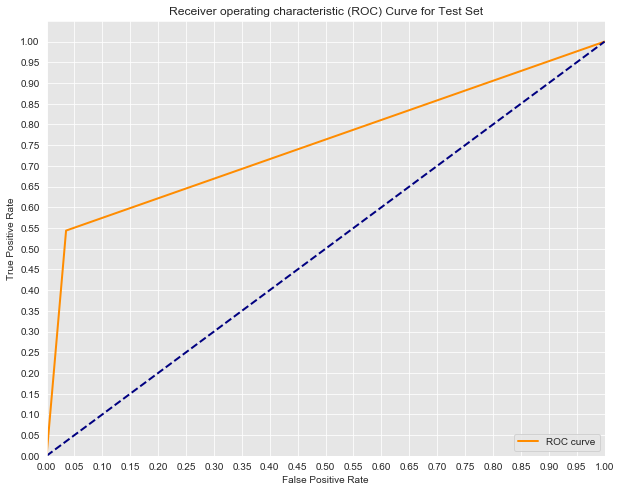

In [281]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_test_rate1, true_positive_test_rate1, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(false_positive_test_rate1, true_positive_test_rate1)))
print('')
plt.show()

In [ ]:
'''
Classifying revenue when there is no revenue will lead to models that are built upon false revenue making assumtions and 
classifying no revenue when there is revenue will lead to models that are missing revenue making assumtions.  
Both are equaly problematic, and therefore, a model that favors recall and one that favors precision are usefull.  
'''